# Task -1 Anomaly detection
## Student ID1: 206768962
## Student ID2: 203464870
### some notes: you can install Anaconda (python 3 prefered)
#### We will use Pandas, Numpy, and SKLEARN ( they are part of Anaconda distribution)
#### link to the git:
https://github.com/giladliv/Anomaly-detection-Task-01

In [ ]:
!pip install oletools

# Task 01 - Anomaly Detection

## Data Exploration

First let us examine some of the features we have, but before we have to set our imports and data table with DataFrame:

In [171]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.ensemble import IsolationForest


Please note and change the file (source) path and the saveing path

In [172]:
f_path = R"D:\gilad\לימודים\אריאל\מדמח\שנה ג - 2022-2023\זיהוי תקיפות\מטלה 02\conn_attack.csv"
save_path = R"D:\gilad\לימודים\אריאל\מדמח\שנה ג - 2022-2023\זיהוי תקיפות\מטלה 02\conn_attack_anomaly_labels.csv"

In [181]:
'''
record ID - The unique identifier for each connection record.
duration_  This feature denotes the number of seconds (rounded) of the connection. For example, a connection for 0.17s or 0.3s would be indicated with a “0” in this field.
src_bytes This field represents the number of data bytes transferred from the source to the destination (i.e., the amount of out-going bytes from the host).
dst_bytes This fea
ture represents the number of data bytes transferred from the destination to the source (i.e., the amount of bytes received by the host).
'''
df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)
df

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450
...,...,...,...,...
256665,256666,0,306,236
256666,256667,0,288,4017
256667,256668,0,289,1096
256668,256669,0,198,2169


here we can see 2 examples that show a lot of anamaly with a broad sight and we can infer that a lot of "real" data is centerd near to left-down corner (0, 0)

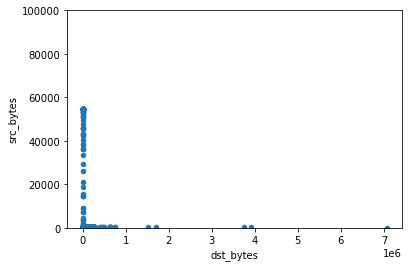

In [187]:
#Relationship with numerical variables
var = 'dst_bytes'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000)); # do not `assume here any thing this is just examples

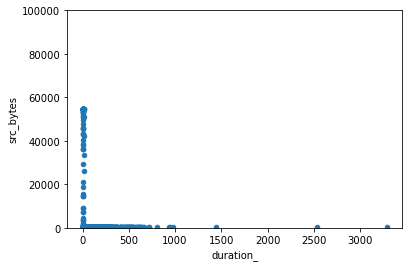

In [188]:
#scatter plot totalbsmtsf/saleprice
var = 'duration_'
data = pd.concat([df['src_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='src_bytes', ylim=(0,100000));

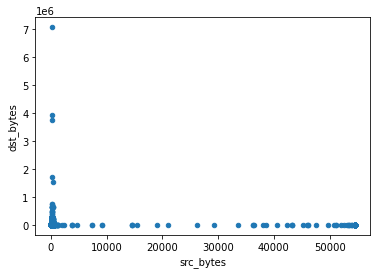

In [189]:
#scatter plot totalbsmtsf/saleprice
var = 'src_bytes'
data = pd.concat([df['dst_bytes'], df[var]], axis=1)
data.plot.scatter(x=var, y='dst_bytes');

We also examined the correlation and we understood due to the fact that the values are very low and very close to 0, that there is not a segnificant correlation between 2 feauters only.
That means that we cannot rely on a simple linear algorithm, we have to find something more suitable:

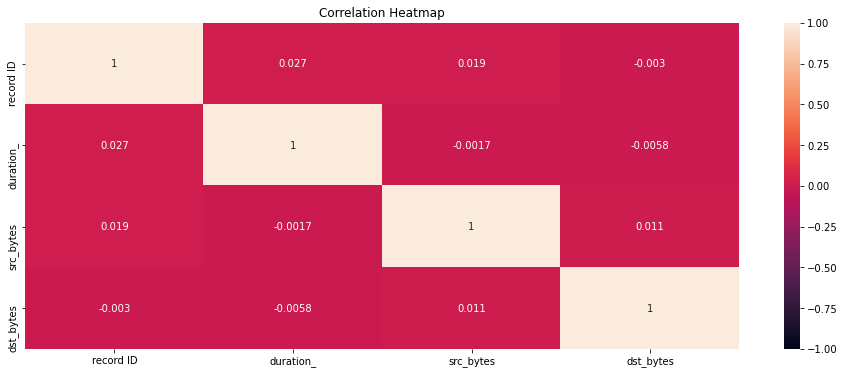

In [190]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12});

Another interesting thing - with spectating the data we saw that there is a lot of records that repeat on them themselves with a small gap and a lot of bytes and duration of 0, so we can inffer that the data had been injected to our systems

# Machine Learning Algorithms

as we searched for good ML technique we found that a very good algorithm for anomaly detection is "Isolation Forest".
It can find a big group of data and to find the outliners of them.
It is good due to the graphs we saw that has a lot os forests and anomalies.
Here we continue to the program itself

In [191]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

We got some help of setting the ML algorithm in python from: https://www.youtube.com/watch?v=obSQuZe87Ac&t=315s
Here we can se the basics, the algorithm predict based on the data if the value is 1 or -1: 1 is an inliner and -1 is an outliner.
Which means that when we got 1 it is not an anomaly, and when it is -1 it is an anomaly.

In [192]:
model = IsolationForest()
df_for_ml = list(zip(df["duration_"], df["src_bytes"],df["dst_bytes"]))
model.fit(df_for_ml)
predict = model.predict(df_for_ml)

d['predict'] = predict
d['predict'] = d['predict'].apply(lambda x: 0 if x == 1 else 1)
df['predict'] = d['predict']

In [193]:
# save the findings to the csv file
df.to_csv(save_path, sep=',', index=False, header=False, encoding='utf-8')

## Statistics

we can se here how the "real" data is looked like - it is very arranged and it is very close with some structure.

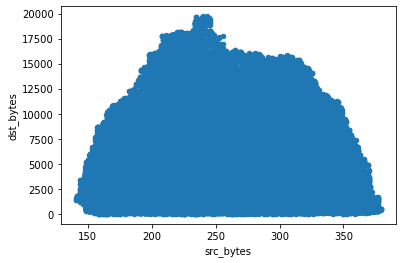

In [194]:
#Relationship with numerical variables
tempDF = d[d['predict'] == 0]
x_t = 'src_bytes'
y_t = 'dst_bytes'
data = pd.concat([tempDF[y_t], tempDF[x_t]], axis=1)
data.plot.scatter(x=x_t, y=y_t); # do not `assume here any thing this is just examples

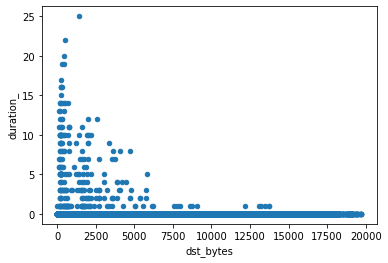

In [195]:
#Relationship with numerical variables
y_t = 'duration_'
x_t = 'dst_bytes'
data = pd.concat([tempDF[y_t], tempDF[x_t]], axis=1)
data.plot.scatter(x=x_t, y=y_t); # do not `assume here any thing this is just examples

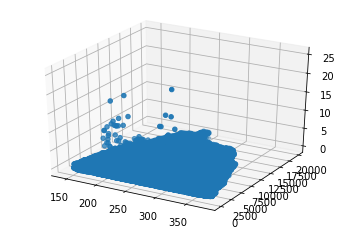

In [196]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = tempDF[['duration_']]
xdata = tempDF[['src_bytes']]
ydata = tempDF[['dst_bytes']]
ax.scatter3D(xdata, ydata, zdata, cmap='Greens');

## accurecy check

here we want to examine our accurecy with some other mls to check our accuracy and to provide us the ?Confusion matrixes by other ML algorithms.
First we Will have to make our program to chose the data to train and the data to test.

In [198]:
X = df[['duration_', 'src_bytes', 'dst_bytes']]
y = df['predict']

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

here we want to check our tests frames on the 

In [207]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
classifier_names = ["Logistic Regression", "KNN", "Random Forest","SVM"]

classifiers = [LogisticRegression(), KNeighborsClassifier(), RandomForestClassifier(), LinearSVC()]

zipped_clf = zip(classifier_names,classifiers)

In [208]:
def classifier(classifier, t_train, c_train, t_test, c_test):
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([
            ('standardize', StandardScaler()),                         
            ('classifier', c)
        ])
        print("Validation result for {}".format(n))
        print(c)
        clf_acc, actual, predicted = fit_classifier(checker_pipeline, t_train, c_train, t_test,c_test)
        result.append((n,clf_acc))
        create_confusion_matrix(actual, predicted, n)
    return result

In [209]:
from sklearn import metrics
import matplotlib.pyplot as plt

def create_confusion_matrix(actual, predicted, name: str = ''):
    title = "confusion matrix (in per)"
    if name != '':
        title += f' :\nClassifier {name}'
    confusion_matrix = metrics.confusion_matrix(actual, predicted)
    confusion_matrix = confusion_matrix

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [True, False])
    
    cm_display.plot()
    cm_display.ax_.set_title(title)

In [210]:
def fit_classifier(pipeline, x_train, y_train, x_test, y_test):
    model_fit = pipeline.fit(x_train, y_train)
    y_pred = model_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy, y_test, y_pred

Validation result for Logistic Regression
LogisticRegression()
accuracy score: 96.50%
Validation result for KNN
KNeighborsClassifier()
accuracy score: 99.70%
Validation result for Random Forest
RandomForestClassifier()
accuracy score: 99.92%
Validation result for SVM
LinearSVC()
accuracy score: 96.66%


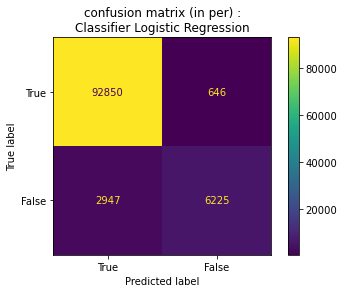

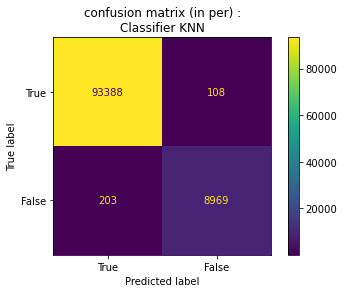

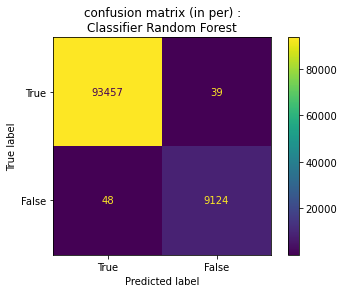

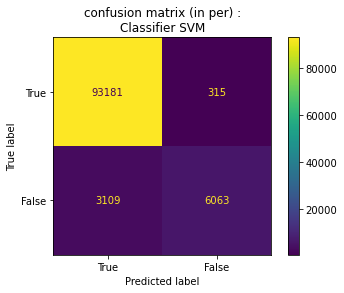

In [211]:
result = classifier(zipped_clf, X_train, y_train, X_test, y_test)